# NYC_Vehicle_Crash_Analysis  

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("Motor_Vehicle_Collisions_-_Crashes.pkl")

In [4]:
df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


# Exploratory Data Analysis (EDA) 

In [5]:
df.columns

Index(['CRASH DATE_CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

In [7]:
df.describe()

,CRASH DATE_CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,2018245,1.788560e+06,1.788560e+06,2.018227e+06,2.018214e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06
mean,2017-05-14 17:39:03.899198976,4.062776e+01,-7.375228e+01,3.024249e-01,1.446328e-03,5.518507e-02,7.253827e-04,2.612468e-02,1.119785e-04,2.179889e-01,5.896212e-04,3.116455e+06
min,2012-07-01 00:05:00,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,2014-12-19 18:00:00,4.066792e+01,-7.397493e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.140681e+06
50%,2017-03-29 21:15:00,4.072102e+01,-7.392732e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.645346e+06
75%,2019-06-10 18:30:00,4.076956e+01,-7.386665e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.150156e+06
max,2023-08-15 23:59:00,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.655026e+06
std,NaN,1.980901e+00,3.727568e+00,6.937633e-01,4.007201e-02,2.412867e-01,2.741556e-02,1.614267e-01,1.062812e-02,6.549700e-01,2.648117e-02,1.503997e+06


In [8]:
df.shape

(2018245, 28)

In [9]:
df.isnull().sum()

CRASH DATE_CRASH TIME                  0
BOROUGH                           627854
ZIP CODE                          628092
LATITUDE                          229685
LONGITUDE                         229685
LOCATION                          229685
ON STREET NAME                    424807
CROSS STREET NAME                 755532
OFF STREET NAME                  1685810
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6348
CONTRIBUTING FACTOR VEHICLE 2     307909
CONTRIBUTING FACTOR VEHICLE 3    1875114
CONTRIBUTING FACTOR VEHICLE 4    1986122
CONTRIBUTING FACTOR VEHICLE 5    2009575
COLLISION_ID                           0
VEHICLE TYPE CODE 1                12677
VEHICLE TYPE COD

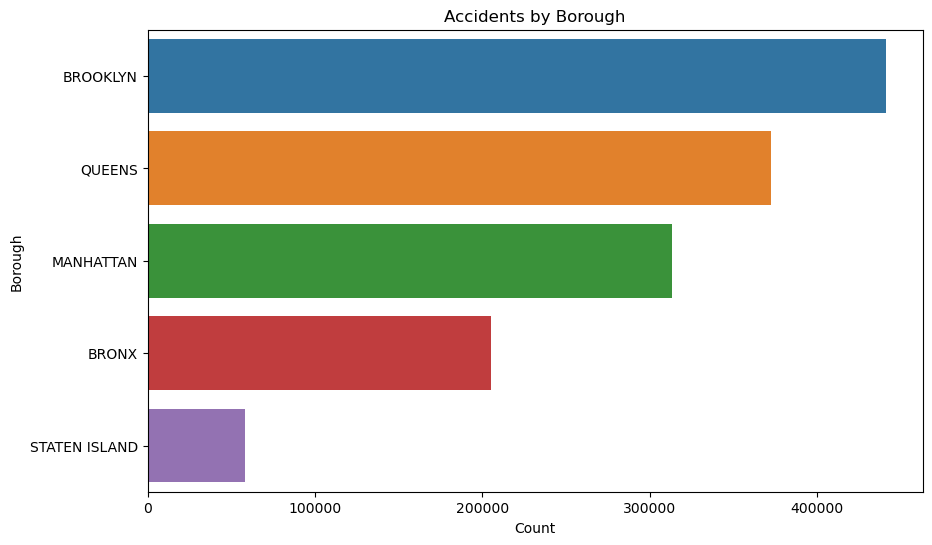

In [39]:
# Bar plot for 'BOROUGH'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='BOROUGH', order=df['BOROUGH'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Borough')
plt.title('Accidents by Borough')
plt.show()


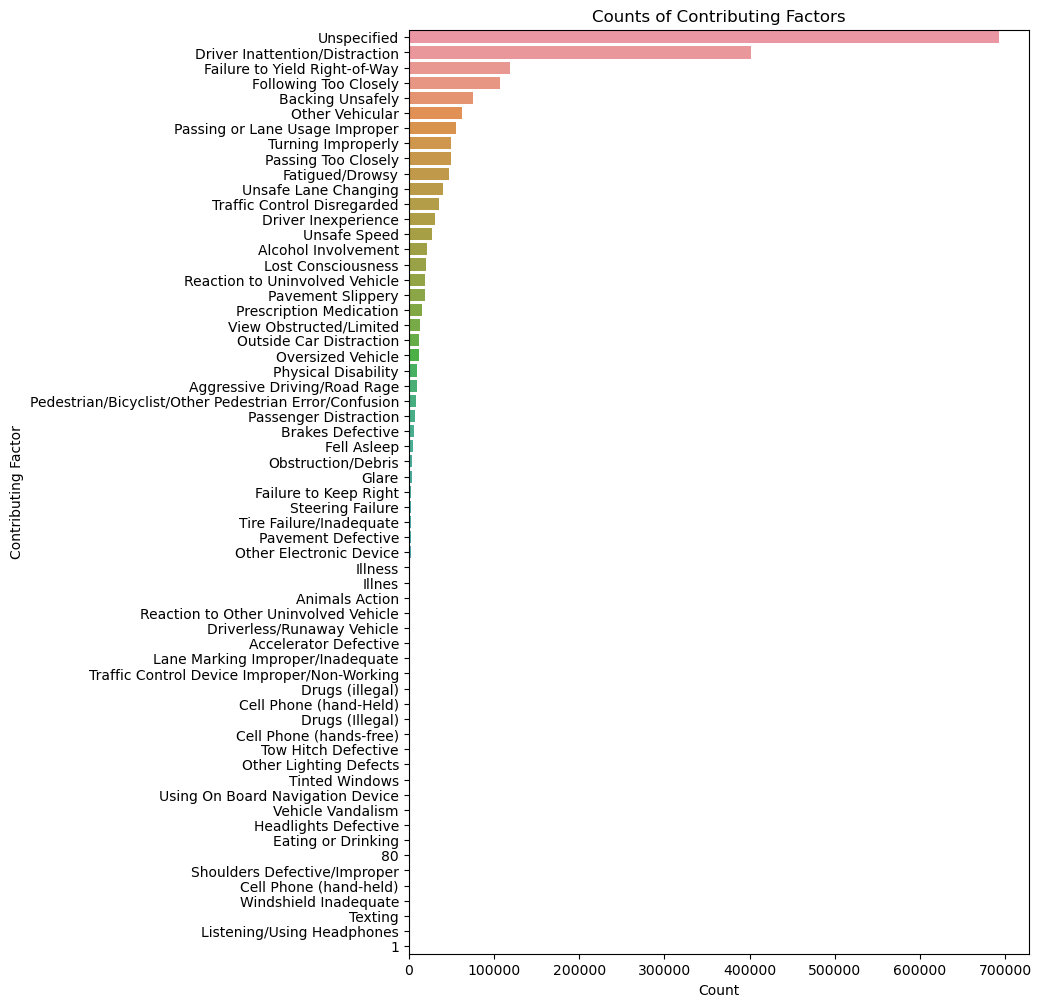

In [34]:
# Bar plot for 'CONTRIBUTING FACTOR VEHICLE 1'
plt.figure(figsize=(8, 12))
sns.countplot(data=df, y='CONTRIBUTING FACTOR VEHICLE 1', order=df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Contributing Factor')
plt.title('Counts of Contributing Factors')
plt.show()


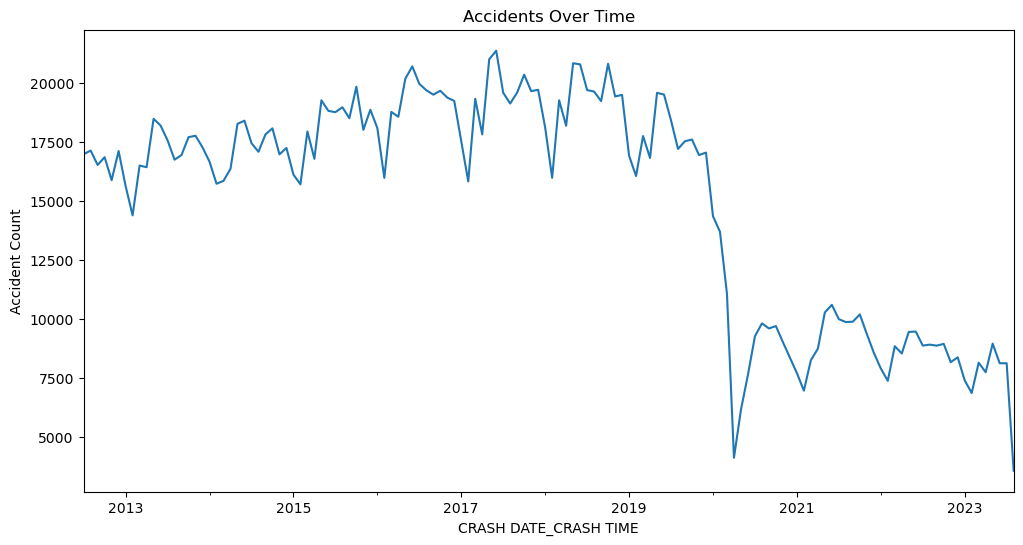

In [40]:
# Time series plot for accidents over time
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])
df_time_series = df.set_index('CRASH DATE_CRASH TIME')
plt.figure(figsize=(12, 6))
df_time_series.resample('M').size().plot(legend=False)
plt.xlabel('CRASH DATE_CRASH TIME')
plt.ylabel('Accident Count')
plt.title('Accidents Over Time')
plt.show()

# Question 1: Which borough has had the highest total number of crashes reported since 2012? (Ignore missing values)


In [10]:
# Convert the 'DATE' column to datetime to work with dates
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Filter the data for records since 2012
df = df[df['CRASH DATE_CRASH TIME'].dt.year >= 2012]

# Group the data by borough and count the crashes in each borough
borough_crash_counts = df['BOROUGH'].value_counts()

# Find the borough with the highest total crashes
highest_crash_borough = borough_crash_counts.idxmax()
highest_crash_count = borough_crash_counts.max()

print(f"The borough with the highest total crashes since 2012 is {highest_crash_borough} with {highest_crash_count} crashes.")


The borough with the highest total crashes since 2012 is BROOKLYN with 441026 crashes.


# Question 2: Which Borough Has the Highest Crashes per 100,000 People Since July 2012?

In [44]:
population_data = pd.DataFrame({
    'BOROUGH': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'Population': [1446788, 2648452, 1638281, 2330295, 487155]
})
population_data

,BOROUGH,Population
0,Bronx,1446788
1,Brooklyn,2648452
2,Manhattan,1638281
3,Queens,2330295
4,Staten Island,487155


In [43]:
# Convert the 'DATE' column to datetime to work with dates
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Filter the data for records since July 2012
df = df[df['CRASH DATE_CRASH TIME'] >= '2012-07-01']

# Define the population estimates
population_estimates = {
    'Bronx': 1446788,
    'Brooklyn': 2648452,
    'Manhattan': 1638281,
    'Queens': 2330295,
    'Staten Island': 487155
}

# Group the crash data by borough
grouped_by_borough = df.groupby('BOROUGH')

# Calculate the total crashes in each borough
borough_crash_counts = grouped_by_borough.size()

# Calculate the crash rate per 100,000 people for each borough
crash_rates = {}
for borough, population in population_estimates.items():
    if borough in borough_crash_counts:
        crash_rate = (borough_crash_counts[borough] / population) * 100000
        crash_rates[borough] = crash_rate

if not crash_rates:
    print("No crash rate data available.")
else:
    # Find the borough with the highest crash rate per 100,000 people
    max_crash_rate_borough = max(crash_rates, key=crash_rates.get)
    max_crash_rate = crash_rates[max_crash_rate_borough]

    print(f"The borough with the most crashes per 100,000 people since July 2012 is {max_crash_rate_borough}, with {max_crash_rate:.2f} crashes per 100,000 population.")


No crash rate data available.


# Question 3: Leading Cause of Crashes and Proportion (Excluding 'Unspecified' Factor)

In [16]:
# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is not 'Unspecified'
df_filtered = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Count the occurrences of each unique value in 'CONTRIBUTING FACTOR VEHICLE 1'
factor_counts = df_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Find the leading cause (excluding 'Unspecified')
leading_cause = factor_counts.idxmax()
leading_cause_count = factor_counts.max()

# Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(df_filtered)
proportion_attributable = (leading_cause_count / total_accidents) * 100

print(f"The leading cause of crashes (excluding 'Unspecified') is '{leading_cause}' with {leading_cause_count} occurrences.")
print(f"The proportion of accidents attributable to this cause is {proportion_attributable:.2f}%.")


The leading cause of crashes (excluding 'Unspecified') is 'Driver Inattention/Distraction' with 401262 occurrences.
The proportion of accidents attributable to this cause is 30.27%.


# Question 4: Proportion of Top 3 Causes of Crashes (Excluding 'Unspecified')


In [27]:
# 1. Filter rows with 'Unspecified'
filtered_data = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# 2. Calculate the top 3 causes (ignoring 'Unspecified')
top_3_causes = filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3).index.tolist()

# 3. Calculate the proportion of total crashes accounted for by the top 3 causes
total_accidents = len(filtered_data)
accidents_with_top_3_causes = len(filtered_data[filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_3_causes)])
proportion = accidents_with_top_3_causes / total_accidents

print("Top 3 Causes of Crashes (Ignoring 'Unspecified'):", top_3_causes)
print("Proportion of Total Crashes Accounted for by Top 3 Causes:", proportion)

Top 3 Causes of Crashes (Ignoring 'Unspecified'): ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely']
Proportion of Total Crashes Accounted for by Top 3 Causes: 0.4737010461641528


# Question 5: Total Accidents with at Least One Fatality (Since 2012)


In [19]:
# Convert the 'DATE' column to datetime to work with dates
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Filter the data for records since 2012
df_since_2012 = df[df['CRASH DATE_CRASH TIME'].dt.year >= 2012]

# Count the occurrences where at least one person was killed
fatal_accidents_count = len(df_since_2012[df_since_2012['NUMBER OF PERSONS KILLED'] > 0])

print(f"The total count of accidents that involved at least one fatality since 2012 is {fatal_accidents_count}.")

The total count of accidents that involved at least one fatality since 2012 is 2804.


# Question 6: Average Fatal Accidents per 1000 Accidents (Since 2012)


In [20]:
# Convert the 'DATE' column to datetime to work with dates
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Count the total number of accidents
total_accidents_count = len(df)

# Count the number of accidents with at least one person dead
fatal_accidents_count = len(df[df['NUMBER OF PERSONS KILLED'] > 0])

# Calculate the average for every 1000 accidents
average_fatalities_per_1000 = (fatal_accidents_count / total_accidents_count) * 1000

print(f"On average, for every 1000 accidents, {average_fatalities_per_1000:.2f} have resulted in at least one person dead.")

On average, for every 1000 accidents, 1.39 have resulted in at least one person dead.


# Question 7: Proportion of Accidents Without a Borough Code


In [21]:
# Count the total number of accidents
total_accidents_count = len(df)

# Count the number of accidents without a Borough code (missing or empty 'BOROUGH' column)
accidents_without_borough_count = df['BOROUGH'].isna().sum()

# Calculate the proportion of accidents without a Borough code
proportion_without_borough = (accidents_without_borough_count / total_accidents_count) * 100

print(f"The proportion of accidents in the data without a Borough code is {proportion_without_borough:.2f}%.")

The proportion of accidents in the data without a Borough code is 31.11%.


# Question 8: Most Common Vehicle Combination in Accidents


In [49]:
# Group the data by the combination of 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2'
vehicle_combinations = df.groupby(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']).size().reset_index(name='accident_count')

# Find the combination with the most accidents
most_common_combination = vehicle_combinations.loc[vehicle_combinations['accident_count'].idxmax()]

print(f"The combination of vehicles with the most number of accidents is '{most_common_combination['VEHICLE TYPE CODE 1']}' and '{most_common_combination['VEHICLE TYPE CODE 2']}' with {most_common_combination['accident_count']} accidents.")

The combination of vehicles with the most number of accidents is 'Sedan' and 'Sedan' with 197944 accidents.
